In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Índice<a id="ind"></a>

- [1. Bibliotecas](#bib)
- [2. Leitura e informações sobre os dados](#leitura)
- [3. Inspeção inicial nos dados](#inspecao)
- [4. Análise descritiva](#eda)
    - [4.1 Análise para a adesão de novos anfitriões](#ana_bairos)
    - [4.1 Análise por bairros](#ana_bairos)
        - [4.2.1 Análise do número de anfitriões por bairro](#anfitrioes)
        - [4.2.2 Quais os bairros mais caros e mais baratos?](#bairro_preco)
        - [4.2.3 Quais os bairros com a maior taxa de aceitação? Existe relação entre a taxa de aceitação e o preço médio da diária?](#aceitacao)
        - [4.2.4 Análise do números de quartos nas acomodações](#num_quartos)

## 1. Bibliotecas<a id="bib"></a>
[Índice](#ind)

In [4]:
# bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.gridspec import GridSpec

# para teste de hipóteses
from scipy.stats import ttest_ind

import importlib    
from pathlib import Path
import os

# para completmentar os gráficos
import graficosComple.limites_dos_graficos as li
import graficosComple.numeros_nos_graficos as ng
import graficosComple.anotacoes as an
import graficosComple.numeros_internos_barras as ni

# modulos do projeto
import modulos.template as tmp

# define o tema so seaborn
sns.set_theme(style='white')

# forma de exibição de dataframes
pd.pandas.set_option('display.max_columns', None)

## 2. Leitura e informações sobre os dados<a  id="leitura"></a>
[Índice](#ind)

Os dados são relativos à empresa de locação de imóveis Airbnb para a cidade do Rio de Janeiro e foram coletados no [site da própria empresa](http://insideairbnb.com/get-the-data), por volta do dia 26 de dezembro. Na fonte podem ser baixados 3 arquivos, contudo somente o arquivo listing.csv se mostrou relevante.

Antes realizar as análises, os dados passaram por um processo de identificação de tipos de variáveis [1], visando a redução do tamanho dos dados em memória, e por um processo de limpeza [2]. Como o resultado foi gerado o arquivo "1_listings_cl.feather usado nas análises.
    

[1] Arquivos .ipynb do diretório "tratamento_dados_iniciais" deste projeto</br>
[2] Arquivo "1_limpeza_dos_dados.ipynb" na pasta raiz deste projeto

In [6]:
# carrega od dados
current_path = os.getcwd()
path_root=Path(current_path)
df = pd.read_feather(path_root/"dados/1_listings_cl.feather")  

## 3. Inspeção inicial nos dados<a id="inspecao"></a>
[Índice](#ind)

**Dimensão dos dados**

In [7]:
print("Número de colunas nos dados: ",df.shape[1])
print("Número de linhas nos dados: ",df.shape[0])

Número de colunas nos dados:  37
Número de linhas nos dados:  11222


**Identificação do tipo de variável e contabilização dos dados ausentes**

In [8]:
pd.DataFrame(zip(df.columns,                 
                 df.dtypes.values,
                 df.isnull().sum().values,),
             columns=["variável", "tipo","num. de dados ausentes"])

,variável,tipo,num. de dados ausentes
0,host_id,uint32,0
1,host_since,datetime64[ns],0
2,host_response_time,object,0
3,host_response_rate,float64,0
4,host_acceptance_rate,float32,2001
5,host_is_superhost,float64,2
6,host_has_profile_pic,float64,0
7,host_identity_verified,float64,0
8,neighbourhood_cleansed,object,0
9,latitude,float64,0


# 4. Análise descritiva<a id="eda"></a>
[Índice](#ind)

## 4.1 Análise para a adesão de novos anfitriões
A ideia central desta seção é analisar a adesão de novos anfitriões com ao longo dos meses e anos. Com este objetivo foi contabilizado o número de novos anfitriões nos meses disponíveis. Com isto, várias informações puderam ser obtidas, dentre elas, a série temporal do número de novos anfitriões.

In [9]:
# adiciona novas colunas nos dados com número do mes, ano e nome do mês
df['host_since_ano'] = df['host_since'].apply(lambda x: x.year)
df['host_since_mes'] = df['host_since'].apply(lambda x: x.month)
df['host_since_mes_nome'] = df['host_since'].apply(lambda x: x.strftime('%b'))

# verificação
df.head(3)

,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,verifications_email,verifications_phone,verifications_work_email,host_since_ano,host_since_mes,host_since_mes_nome
0,11739,2009-03-29,within a few hours,0.82,1.0,0.0,1.0,1.0,Copacabana,-22.97242,-43.188980,Entire home/apt,4,1 bath,1.0,2.0,225,3,291,36,2016-03-20,2022-09-07,5.00,5.0,5.0,5.0,5.0,5.0,5.0,10,10,0,0,0.04,1,1,0,2009,3,Mar
1,34105,2009-08-26,within a day,1.00,1.0,1.0,1.0,1.0,Copacabana,-22.96467,-43.175529,Entire home/apt,2,1 bath,1.0,1.0,184,3,90,78,2014-01-06,2022-09-12,4.62,5.0,4.0,5.0,5.0,5.0,4.0,2,2,0,0,0.74,1,1,0,2009,8,Aug
2,37072,2009-09-08,within a day,0.83,1.0,0.0,1.0,0.0,Laranjeiras,-22.93598,-43.192928,Entire home/apt,14,3.5 baths,4.0,5.0,2553,1,365,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,NaN,1,1,0,2009,9,Sep


In [10]:
# para o gráfico 1:


# transformações
func_1 = lambda x: x.replace(day=1)     # substitui os dias pelo valor 1
func_2 = lambda x: x.strftime('%m/%y')  # conrvete datetime em strig


# dataframe com número de host por mês
df_date=df['host_since']\
        .apply(func_1)\
        .to_frame()\
        .groupby(by="host_since", as_index=False)\
        .agg(
            numero_host= ('host_since','count')
        )\
        .sort_values(by='host_since',ascending=True)\

df_date['host_since']=df_date['host_since'].apply(func_2)

df_date.tail(5)

,host_since,numero_host
150,05/22,22
151,06/22,29
152,07/22,27
153,08/22,44
154,09/22,11


In [11]:
# para gráfico 2:  

# seleciona dados dos anos 2022, 2021, 2020
df_aux=df[df['host_since_ano'].isin([2022,2021,2020])]


In [12]:
# adiciona novas colunas nos dados com número do mes ano e nome do mes
df['host_since_ano'] = df['host_since'].apply(lambda x: x.year)
df['host_since_mes'] = df['host_since'].apply(lambda x: x.month)
df['host_since_mes_nome'] = df['host_since'].apply(lambda x: x.strftime('%b'))

# verificação
df.head(3)

,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,verifications_email,verifications_phone,verifications_work_email,host_since_ano,host_since_mes,host_since_mes_nome
0,11739,2009-03-29,within a few hours,0.82,1.0,0.0,1.0,1.0,Copacabana,-22.97242,-43.188980,Entire home/apt,4,1 bath,1.0,2.0,225,3,291,36,2016-03-20,2022-09-07,5.00,5.0,5.0,5.0,5.0,5.0,5.0,10,10,0,0,0.04,1,1,0,2009,3,Mar
1,34105,2009-08-26,within a day,1.00,1.0,1.0,1.0,1.0,Copacabana,-22.96467,-43.175529,Entire home/apt,2,1 bath,1.0,1.0,184,3,90,78,2014-01-06,2022-09-12,4.62,5.0,4.0,5.0,5.0,5.0,4.0,2,2,0,0,0.74,1,1,0,2009,8,Aug
2,37072,2009-09-08,within a day,0.83,1.0,0.0,1.0,0.0,Laranjeiras,-22.93598,-43.192928,Entire home/apt,14,3.5 baths,4.0,5.0,2553,1,365,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,NaN,1,1,0,2009,9,Sep


In [13]:
# para conteúdo dos textos1:

# numero de novos hostes em 2022
count_2021= df.query('host_since_ano == 2021 & host_since_mes in (1,2,3,4,5,6,7,8)')\
           .shape[0]

# numero de novos hostes em 2022
count_2022= df\
    .query('host_since_ano == 2022 & host_since_mes in (1,2,3,4,5,6,7,8)')\
    .shape[0]

crescimento = ((count_2022/count_2021)-1)*100


In [14]:
# para conteúdo dos textos 2:

df_mes_count=df_aux.query("host_since_ano in (2020,2021)")\
          .groupby(by="host_since_mes_nome", as_index=False)\
          .agg(
                mes_count= ('host_since_mes_nome','count')
            )\
          .sort_values(by='mes_count',ascending=False)

# valores para os textos2
mes_count_maior = df_mes_count.head(1)['mes_count'].to_list()[0]
mes_maior = df_mes_count.head(1)['host_since_mes_nome'].to_list()[0]
mes_count_menor = df_mes_count.tail(1)['mes_count'].to_list()[0]
mes_menor = df_mes_count.tail(1)['host_since_mes_nome'].to_list()[0]



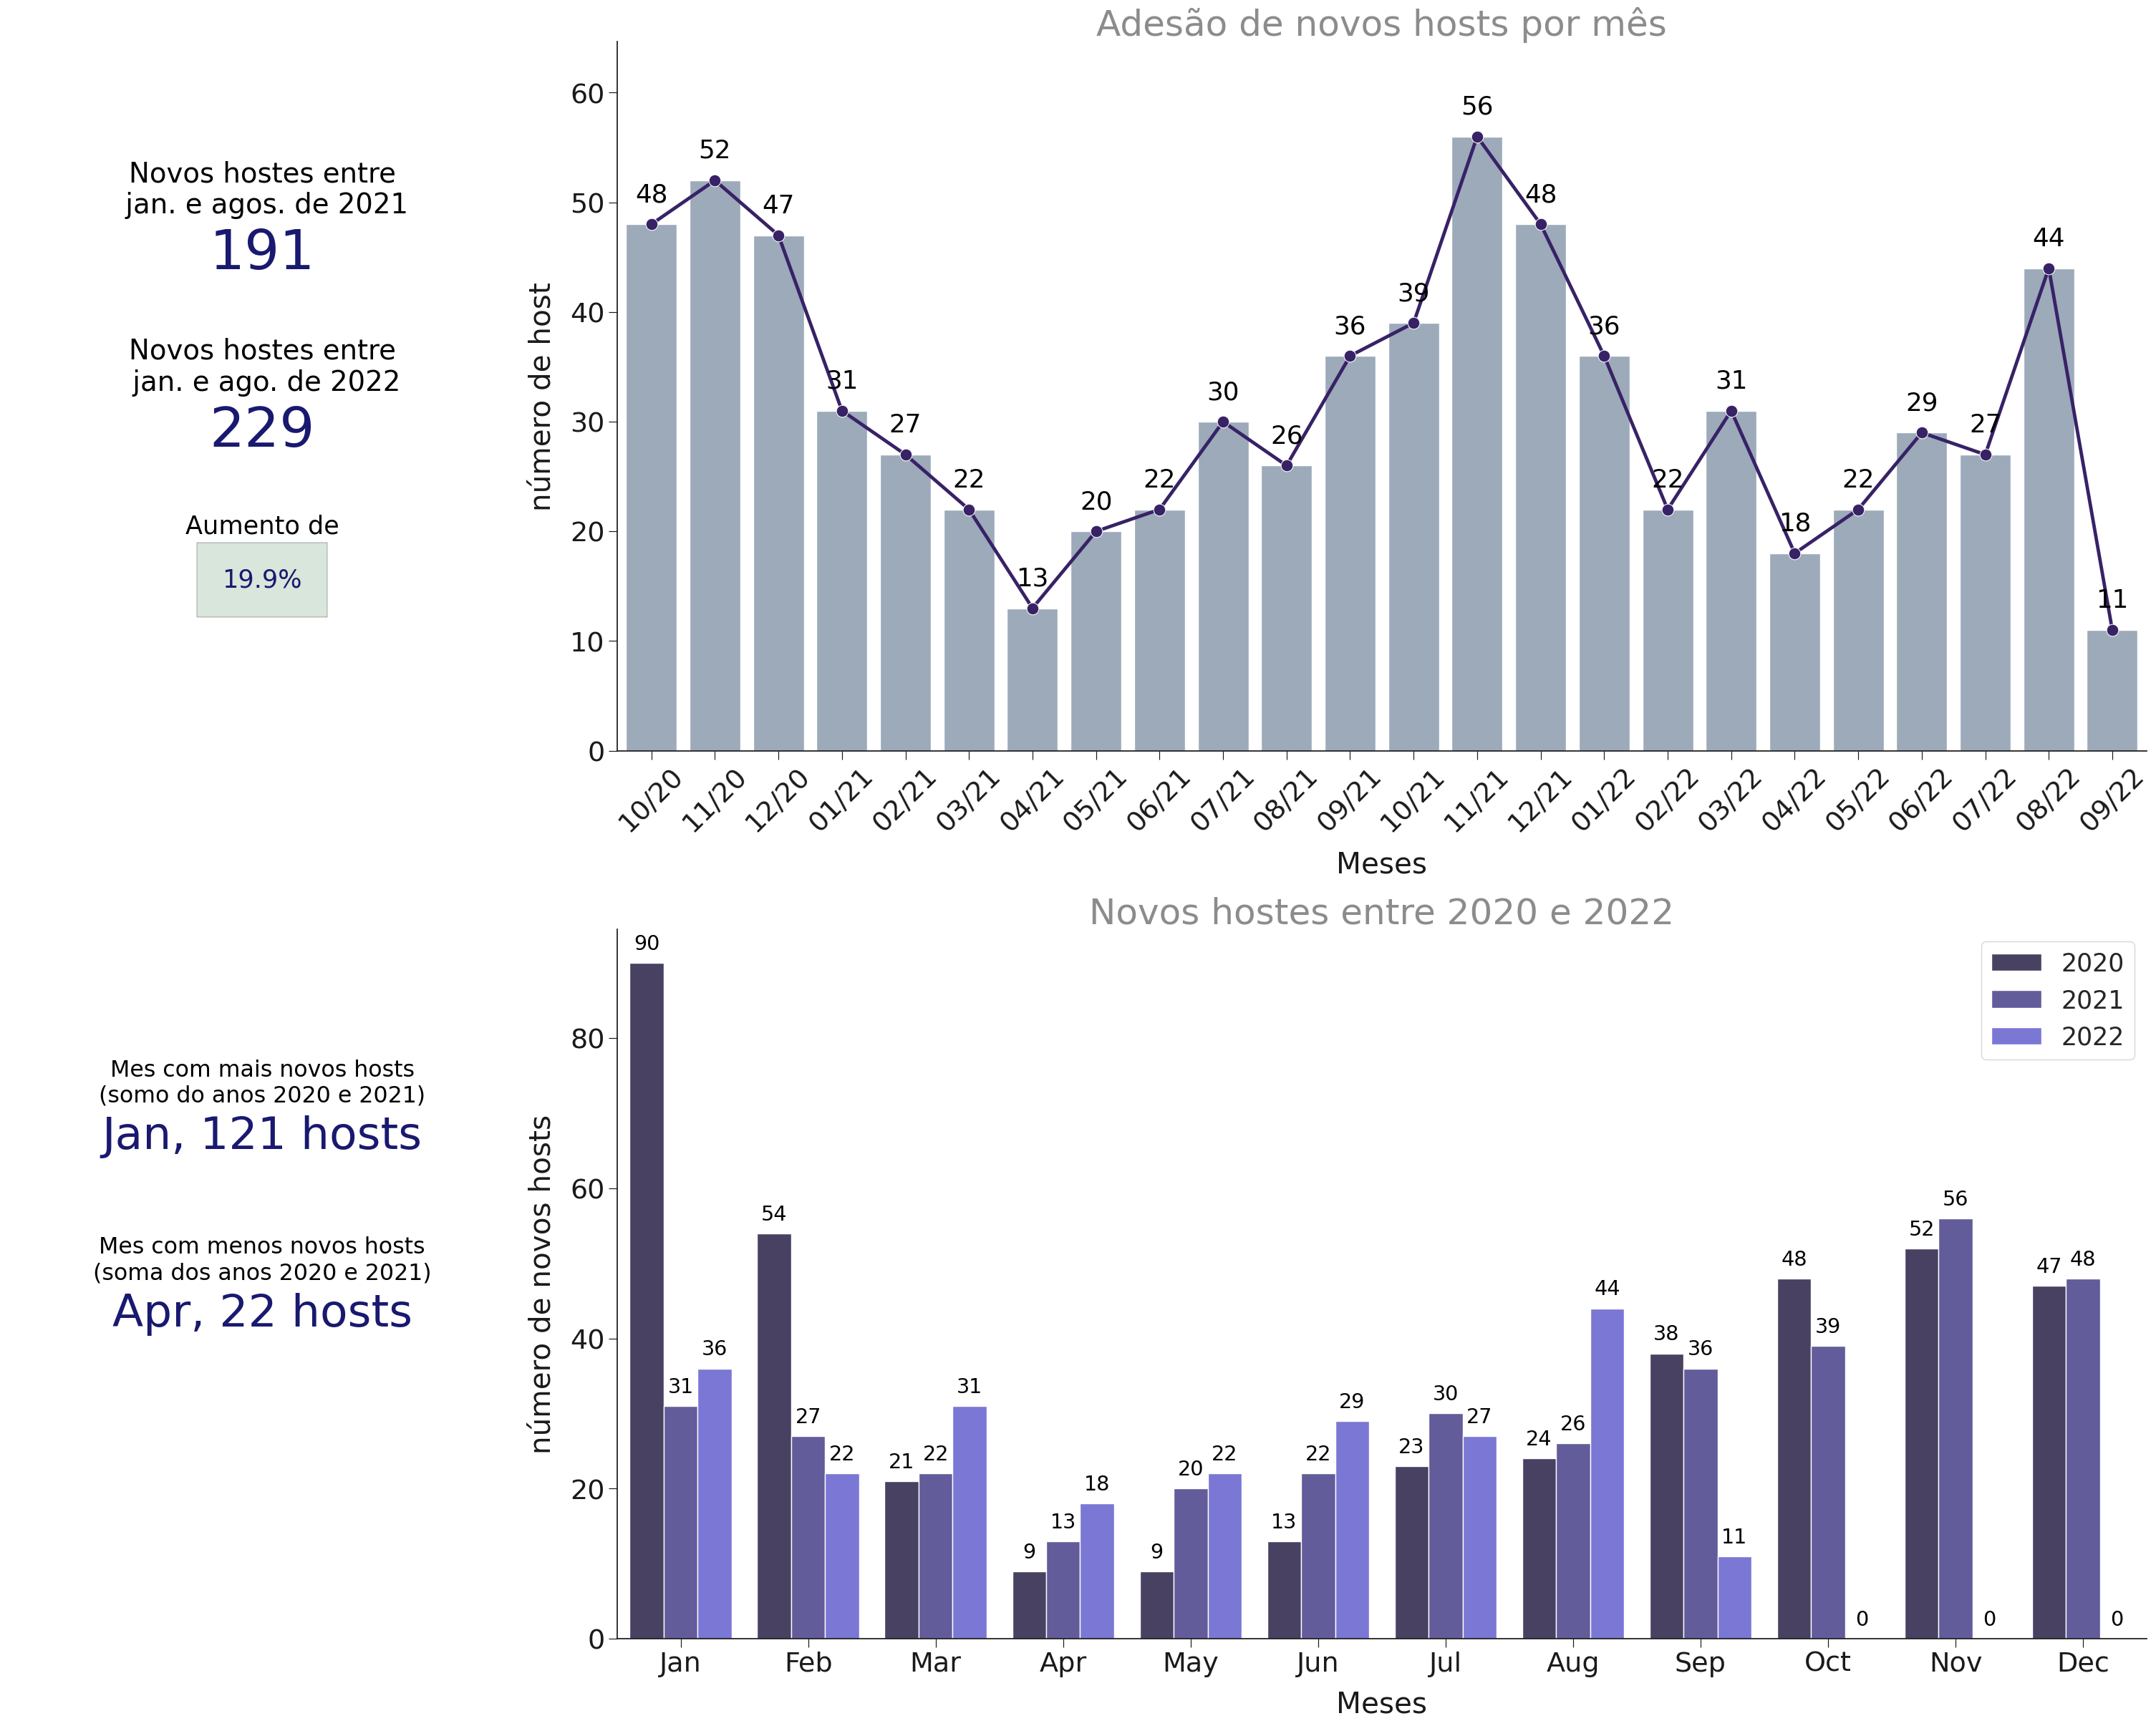

In [15]:
# monta a figura:

fig = plt.figure(constrained_layout=True, figsize=(30, 24))

gs = GridSpec(2,4, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:])
ax3 = fig.add_subplot(gs[1, 1:])
ax4 = fig.add_subplot(gs[1, 0])

# textos 1
an.anotacoes_valor_texto(ax1,texto1='Novos hostes entre\n jan. e agos. de 2021',
                          texto2=f'{count_2021}', f_x=0.5,  f_y=0.75,
                          numLetra=0.055, n_maior= 2, cor_valor='#191970',
                          cor_texto='black',f_textos=10)
an.anotacoes_valor_texto(ax1,texto1='Novos hostes entre\n jan. e ago. de 2022',
                          texto2=f'{count_2022}', f_x=0.5, f_y=0.50,
                          numLetra=0.055, n_maior= 2,                          
                          cor_texto='black',f_textos=10)
an.anotacoes_texto_box(ax1,texto1='Aumento de',texto2=f'{round(crescimento,2)}%',
                        f_x=0.5,f_y=0.30,numLetra=0.05,c_FaceBox="#d8e6db",
                        c_EdgeBox="k",c_LetraBox='#191970',c_LetraTexto='black',
                        boxstyle='square',
                        f_textos=35)
ax1.axis('off')


# grafico 1
sns.barplot(ax=ax2,data=df_date.tail(24), x='host_since',
            y='numero_host',color=tmp.c1_fraca)
sns.lineplot(ax=ax2, data=df_date.tail(24),x='host_since',
             y='numero_host',linewidth=0.002*tmp._k(ax2),
             color=tmp.c1_forte,marker='o',markersize=0.007*tmp._k(ax2))
# edita os eixos
tmp.set_axes_32(ax2, titulo='Adesão de novos hosts por mês',
           xlabel="Meses", ylabel="número de host" )
ng.num_barras_verticais(ax2,f_tam_letra=0.015,f_texto_bar=0.07, d=0)
li.muda_limites_eixo_y(ax2, frac=0.1, tipo_aumento=0)
li.muda_limites_eixo_x(ax2, frac=-0.04, tipo_aumento=2)
ax2.tick_params(axis ='x',labelrotation = 45)


# textos 2
an.anotacoes_valor_texto(ax4,texto1='Mes com mais novos hosts\n(somo do anos 2020 e 2021)',
                          texto2=f'{mes_maior}, {mes_count_maior} hosts', f_x=0.5,  f_y=0.75,
                          numLetra=0.045, n_maior= 2, cor_valor='#191970',
                          cor_texto='black',f_textos=10)
an.anotacoes_valor_texto(ax4,texto1='Mes com menos novos hosts\n(soma dos anos 2020 e 2021)',
                          texto2=f'{mes_menor}, {mes_count_menor} hosts', f_x=0.5, f_y=0.50,
                          numLetra=0.045, n_maior= 2,
                          cor_texto='black',f_textos=10)
ax4.axis('off')


# grafico 2
sns.countplot(ax=ax3,
            data=df_aux,
            x='host_since_mes_nome',
            hue='host_since_ano',
            palette=tmp.pmo_3(3))
# edita os eixos
tmp.set_axes_32(ax3, titulo='Novos hostes entre 2020 e 2022',
           xlabel="Meses", ylabel="número de novos hosts" )
ng.num_barras_verticais(ax3,f_texto_bar=0.04,f_tam_letra=0.012,d=0)
li.muda_limites_eixo_y(ax3, frac=0.0)
ax3.legend(fontsize=25)
             
plt.show()             

             


## 4.1 Análise por bairros<a id="ana_bairos"></a>
[Índice](#ind)

**Preparação dos dados**

Para as análises seguintes foi considerado o preço por dia dos hosts. Esta variável foi definida como a divisão do preço fornecido no dataset pelo número mínimo de diárias e foi chamada de 'preco_diaria'.

Em uma inspeção prévia constatei que alguns hosts traziam informações  duvidosas e que poderiam atrapalhar a análise. Alguns exemplos são:

- Preços excessivamente altos ou excessivamente baixos
- Informações duvidosas, como preço muito baixo em bairros de alto padrão

Estas informações tornaram os resultados de uma primeira análise (não mostrada neste arquivo) duvidosos. Para aumentar a confiança na análise, proponho uma seleção nos dados fazendo os seguintes processos:

 - Eliminar por meio de intervalo interquartil os pontos outliers usando as variáveis 'minimum_nights', 'maximum_nights' e 'preco_diaria'
 
 - Considerar somente os hosts com que possuem reviews ('number_of_reviews'>0). Este critério foi pensado como uma forma selecionar os hosts já receberam hospedes. Isto tem como objetivo descartar hosts com anúncios duvidosos e que possivelmente nunca receberam hospedes.

Nos códigos abaixo é realizada a criação da variável  'preco_diaria' e são feitas as seleções descritas acima.
 

In [16]:
# criação da variável 'preco_diaria'
df['preco_diaria']=df['price']/df['minimum_nights']

In [30]:
from modulos.elimina_outliers import elimin_outliers
ptos_sem_elimin=len(df)

# Etapa 1: elimina outliers
nLinha_elim,fracElim,df_semOut=elimin_outliers(df,
        ['preco_diaria','minimum_nights','maximum_nights'])
ptos_elimin_etapa1= len(df_semOut)


# Etapa 2: considera somente linhas com reviews
df_comRev = df_semOut[df_semOut['number_of_reviews']>0]
ptos_elimin_etapa2=len(df_comRev)


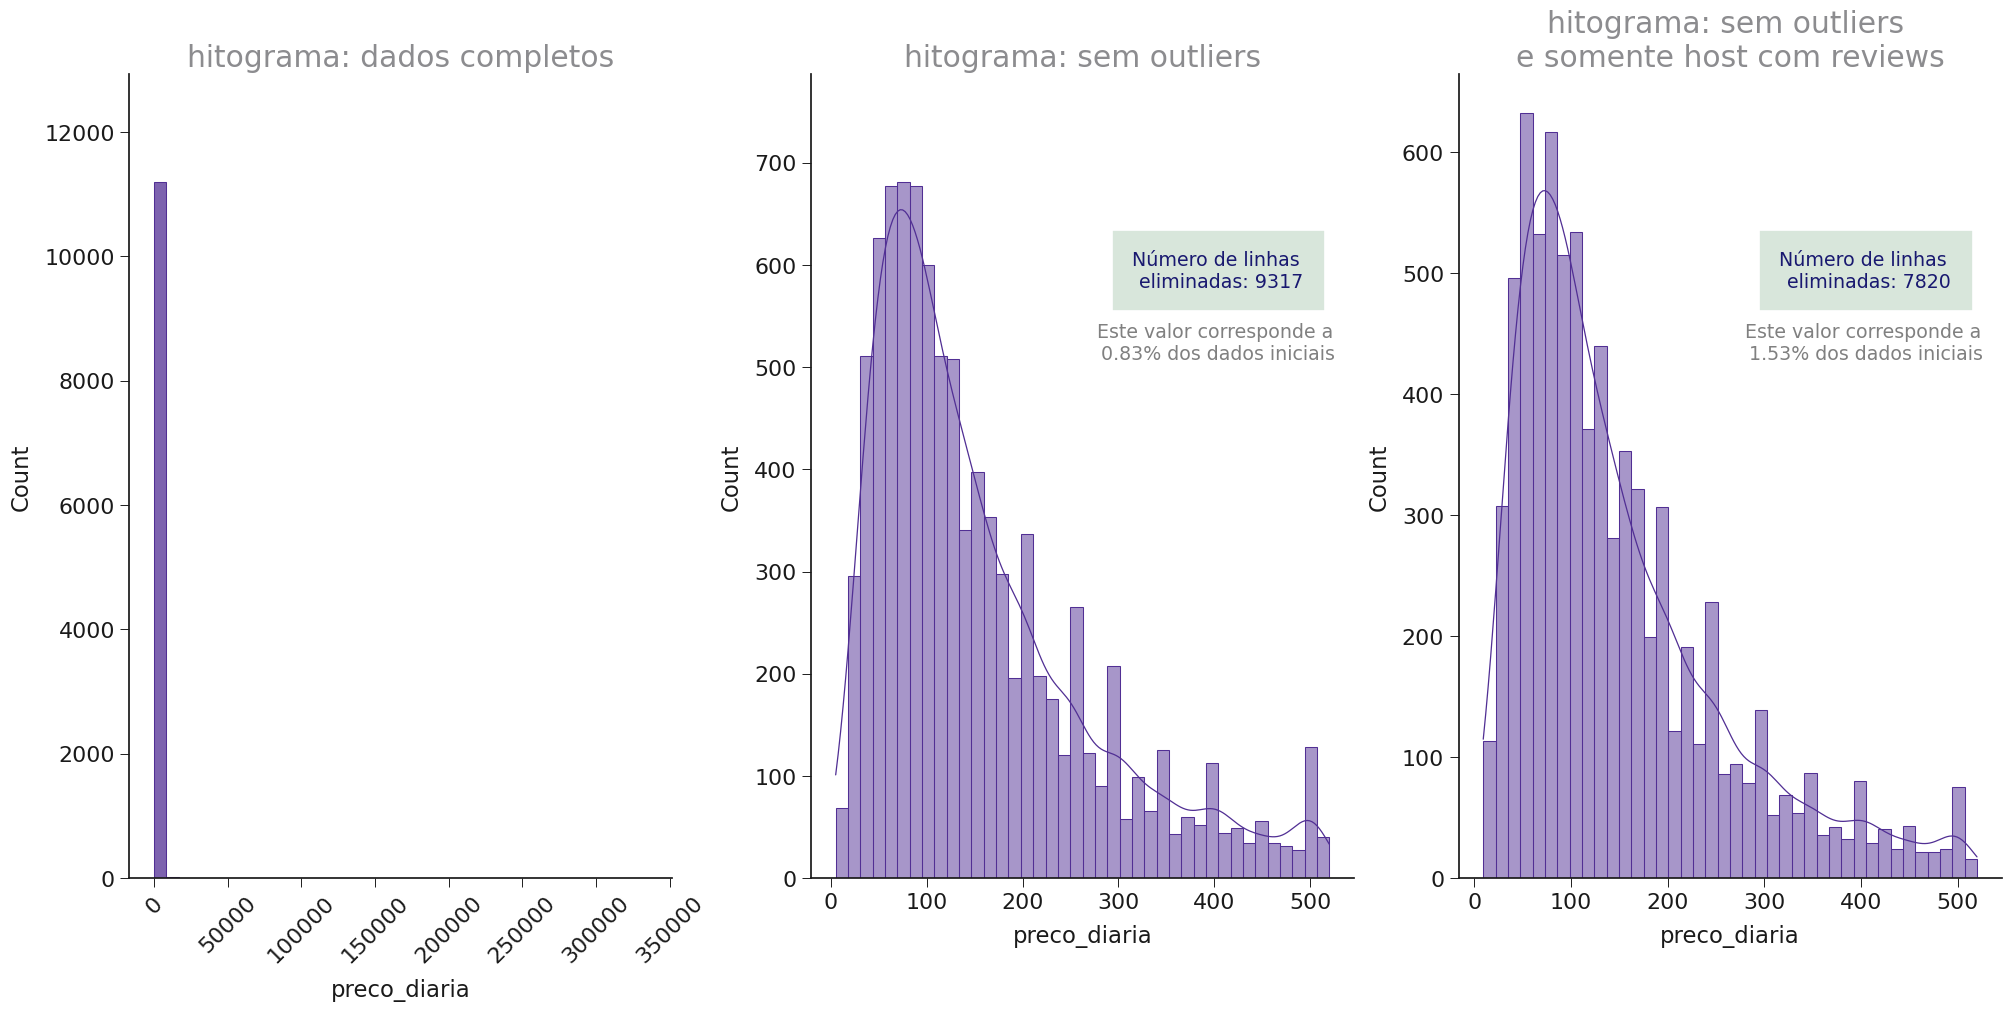

In [56]:
fig = plt.figure(constrained_layout=True, figsize=(20, 10))
gs = GridSpec(1,3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
            
# parametros para as anotações
params=dict(f_x = 0.75,
            f_y = 0.73,
            numLetra=0.030,
            boxstyle="square",
            c_FaceBox="#d8e6db",
            c_EdgeBox="#d8e6db",           
            c_LetraBox='#191970',
            c_LetraTexto='gray',
            f_textos=30)

# figura 1
sns.histplot(ax=ax1, data=df, x='preco_diaria',
             bins=40, element= "bars", kde=False, 
             line_kws={'linewidth':0.002*tmp._k(ax1)},
             edgecolor=tmp.c1_normal,
             color=tmp.c1_normal)
# edição dos eixos
tmp.set_axes_31(ax1, titulo='hitograma: dados completos',
               xlabel='preco_diaria', ylabel="Count")
ylims = li.muda_limites_eixo_y(ax1, frac=0.1)
ax1.tick_params(axis ='x',labelrotation = 45)



# figura 2
sns.histplot(ax=ax2, data=df_semOut, x='preco_diaria',
             bins=40, element= "bars", kde=True, 
             line_kws={'linewidth':0.002*tmp._k(ax1)},
             edgecolor=tmp.c1_normal,
             color=tmp.c1_normal)

# edição dos eixos
tmp.set_axes_31(ax2, titulo='hitograma: sem outliers',
               xlabel='preco_diaria', ylabel="Count")
ylims = li.muda_limites_eixo_y(ax2, frac=0.1)

# Anotação figura 2
texto1 = f'Número de linhas \n eliminadas: {ptos_elimin_etapa1}'
texto2 = f'Este valor corresponde a \n'\
         f'{round(ptos_elimin_etapa1/ptos_sem_elimin,2)}% dos dados iniciais'
an.anotacoes_box_texto(ax2,texto1,texto2,**params ) 




# figura 3
sns.histplot(ax=ax3, data=df_comRev, x='preco_diaria',
             bins=40, element= "bars", kde=True,
             line_kws={'linewidth':0.002*tmp._k(ax1)},
             edgecolor=tmp.c1_normal,
             color=tmp.c1_normal)
# edição dos eixos
tmp.set_axes_31(ax3,
               titulo='hitograma: sem outliers \ne somente host com reviews',
               xlabel='preco_diaria', 
               ylabel="Count")
li.muda_limites_eixo_y(ax2, ylims=ylims)

# Anotação figura 3
texto1 = f'Número de linhas \n eliminadas: {ptos_elimin_etapa2}'
texto2 = f'Este valor corresponde a \n'\
         f'{round((ptos_elimin_etapa1+ptos_elimin_etapa2)/ptos_sem_elimin,2)}% dos dados iniciais'
an.anotacoes_box_texto(ax3,texto1,texto2,**params )



plt.show()

**Agrupamento de valores por bairros**

Para cada bairro (valor da coluna 'neighbourhood_cleansed') são contabilizados:
- Número de hosts
- Média da taxa de aceitação
- média do preço diário
- média do número de reviews
- média das acomodações
- média de quartos

In [53]:
# agrupa dados por bairro
df_host_bairros = df_comRev.groupby('neighbourhood_cleansed', as_index=False)\
    .agg(
        hosts_bairros = ("neighbourhood_cleansed", "count"),
        accaptante_bairros = ("host_acceptance_rate", "mean"),
        price_dia_bairros = ("preco_diaria", "mean"),
        mean_reviews = ("number_of_reviews","mean"),    
        mean_acomodates = ("accommodates", "mean"),
        mean_bedrooms = ("bedrooms", "mean"),
)

# verificação
df_host_bairros.head(4)

,neighbourhood_cleansed,hosts_bairros,accaptante_bairros,price_dia_bairros,mean_reviews,mean_acomodates,mean_bedrooms
0,Alto da Boa Vista,11,0.960000,169.530303,23.363636,4.545455,1.727273
1,Andaraí,11,0.800909,132.257576,15.000000,2.818182,1.400000
2,Anil,12,0.878182,204.180556,3.500000,3.500000,1.416667
3,Bancários,1,1.000000,85.000000,34.000000,5.000000,2.000000


### 4.2.1 Análise do número de anfitriões por bairro<a id="anfitrioes"></a>

In [21]:
# ordena os valores por número de anfitriões
df_aux=df_host_bairros\
            .sort_values(by='hosts_bairros', ascending=False)\
            .head(20)

In [23]:
# Informações para o gráfico de rosca

# nomes dos 3 primerio bairros e 'outros bairros'
listaNomes=df_aux['neighbourhood_cleansed'].head(3).values.tolist()\
                        +['outros bairros']

# numero de hosts nos 3 primeiros bairros e numero de hosts nos demais bairros
listaValores = df_aux['hosts_bairros'].head(3).values.tolist()\
                        +[ df_aux['hosts_bairros'].iloc[3:].sum() ]


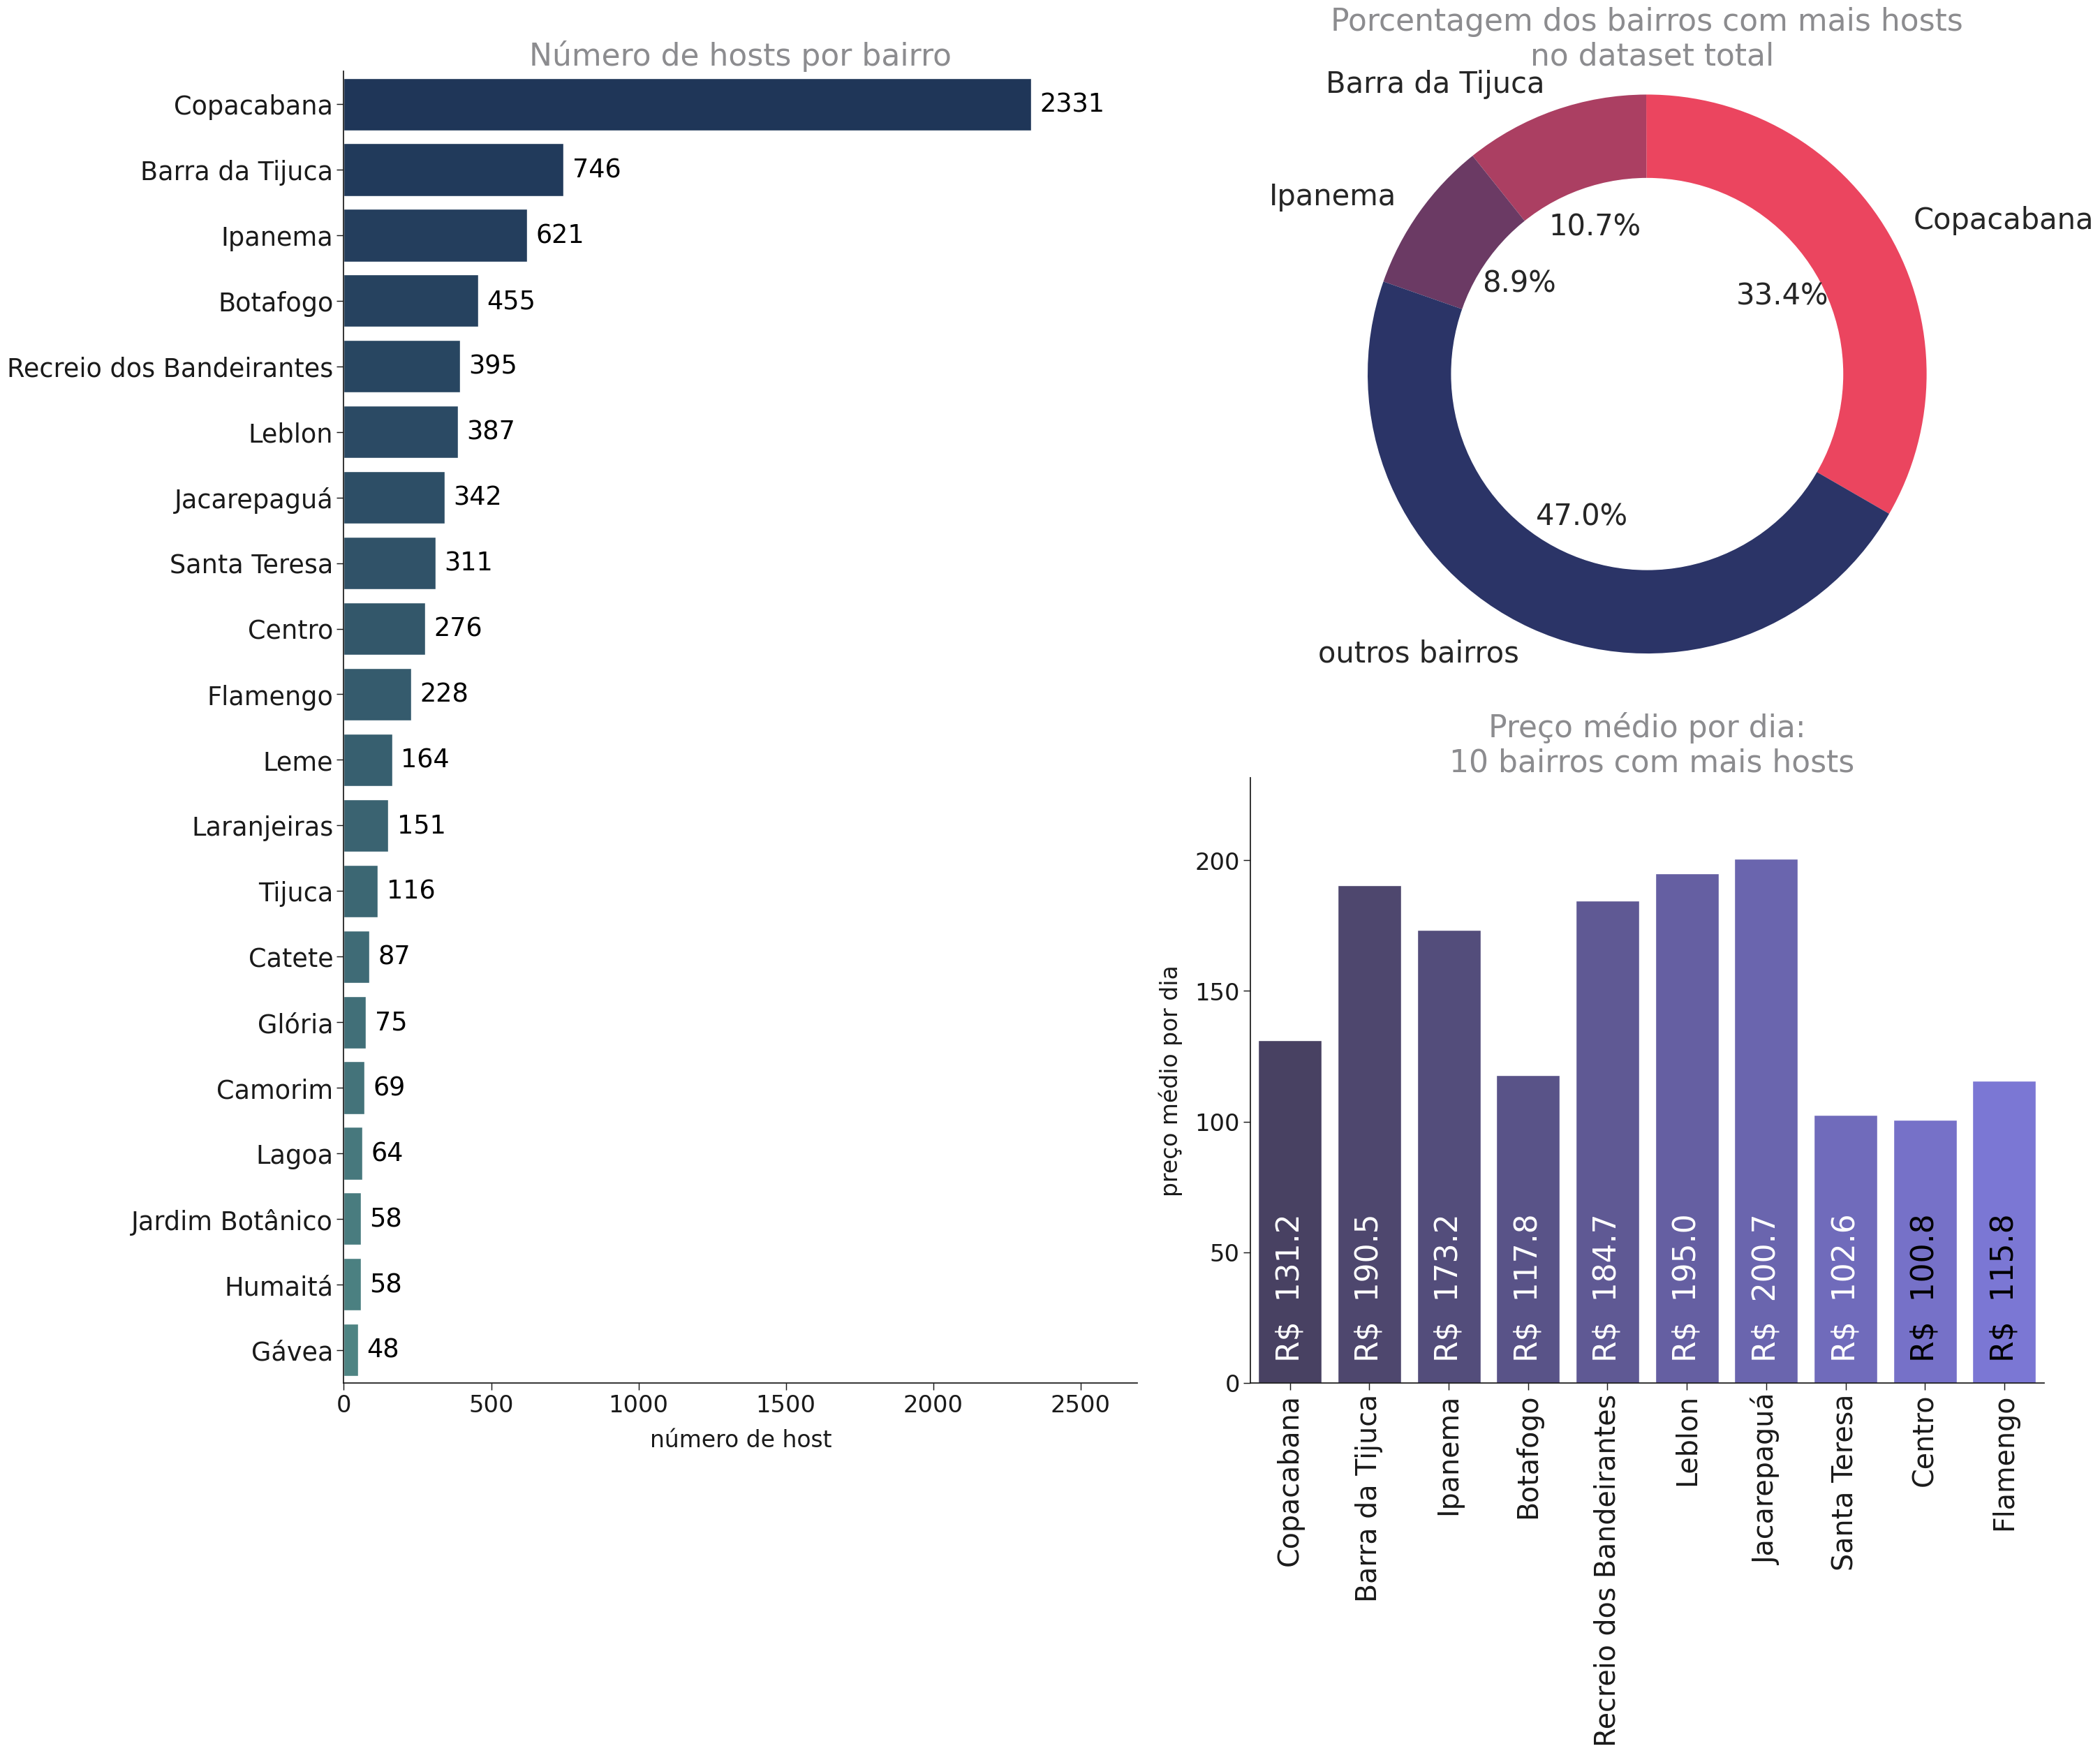

In [25]:
from modulos.graficos import plot_rosca

fig = plt.figure(constrained_layout=True, figsize=(30, 25))

gs = GridSpec(2,2, figure=fig)
ax1 = fig.add_subplot(gs[0:2, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 1])

# Gráfico 1
sns.barplot(ax=ax1,
            data=df_aux,
            y='neighbourhood_cleansed',
            x='hosts_bairros',
            orient='h',
            palette=tmp.pmo_2(24))

# edita os eixos
tmp.set_axes_2(ax1, titulo='Número de hosts por bairro',
           xlabel="número de host" ) 
ng.num_barras_horizontais(ax1,f_tam_letra=0.025,d=0)
li.muda_limites_eixo_x(ax1, frac=0.1, tipo_aumento=0)
ax1.tick_params(axis ='y',labelsize=0.025*tmp._k(ax1))


# gráfico 2
plot_rosca(ax=ax2,
               listaVal=listaValores,
               rotulosVal=listaNomes,   
               paleta=tmp.pmo_1(4),
               d=1,
               tam_letra=30,
               fracCirculo=0.7,
               startangle= -30,
               f_textCentr= 0.56,
               showCount=False)
tmp.set_axes_2(ax2, titulo='Porcentagem dos bairros com mais hosts\n no dataset total')
     


# Gráfico 3
sns.barplot(ax=ax3,
            data=df_aux.head(10),
            y='price_dia_bairros',
            x='neighbourhood_cleansed',            
            palette=tmp.pmo_3(10))

# edita os eixos
tmp.set_axes_2(ax3, titulo='Preço médio por dia:\n 10 bairros com mais hosts',
               ylabel="preço médio por dia" ) 
ni.num_int_barras_verticais(ax3,f_texto_bar=0.065,f_tam_letra=0.03,isTopo=False,
                         d=1,rotation=90,prefix='R$  ')
li.muda_limites_eixo_y(ax3, frac=0.1, tipo_aumento=0)
ax3.tick_params(axis ='x',labelrotation = 90,
                labelsize=0.027*tmp._k(ax3))

plt.show()

### 4.2.2 Quais os bairros mais caros e mais baratos?<a id="bairro_preco"></a>

In [60]:
# ordena os bairros por preço
df_aux=df_host_bairros\
            .sort_values(by='price_dia_bairros', ascending=False)

In [61]:
# numero de hosts nos 10 bairros mais caros e mais baratos
num_host_caros=df_aux['hosts_bairros'].head(10).sum()
num_host_baratos=df_aux['hosts_bairros'].tail(10).sum()

df_num_hosts=pd.DataFrame({'tipos_bairros':['mais caros','mais baratos'],
                           'numero_host':[num_host_caros,num_host_baratos]},
                            index=[1,2])

# total de hosts no dataset
sum_tot=df_aux['hosts_bairros'].sum()

In [62]:
# Informações para o texto: médias de preço
media_total= df_aux['price_dia_bairros'].mean()
meida_caros= df_aux['price_dia_bairros'].head(10).mean()
media_baratos=df_aux['price_dia_bairros'].tail(10).mean()


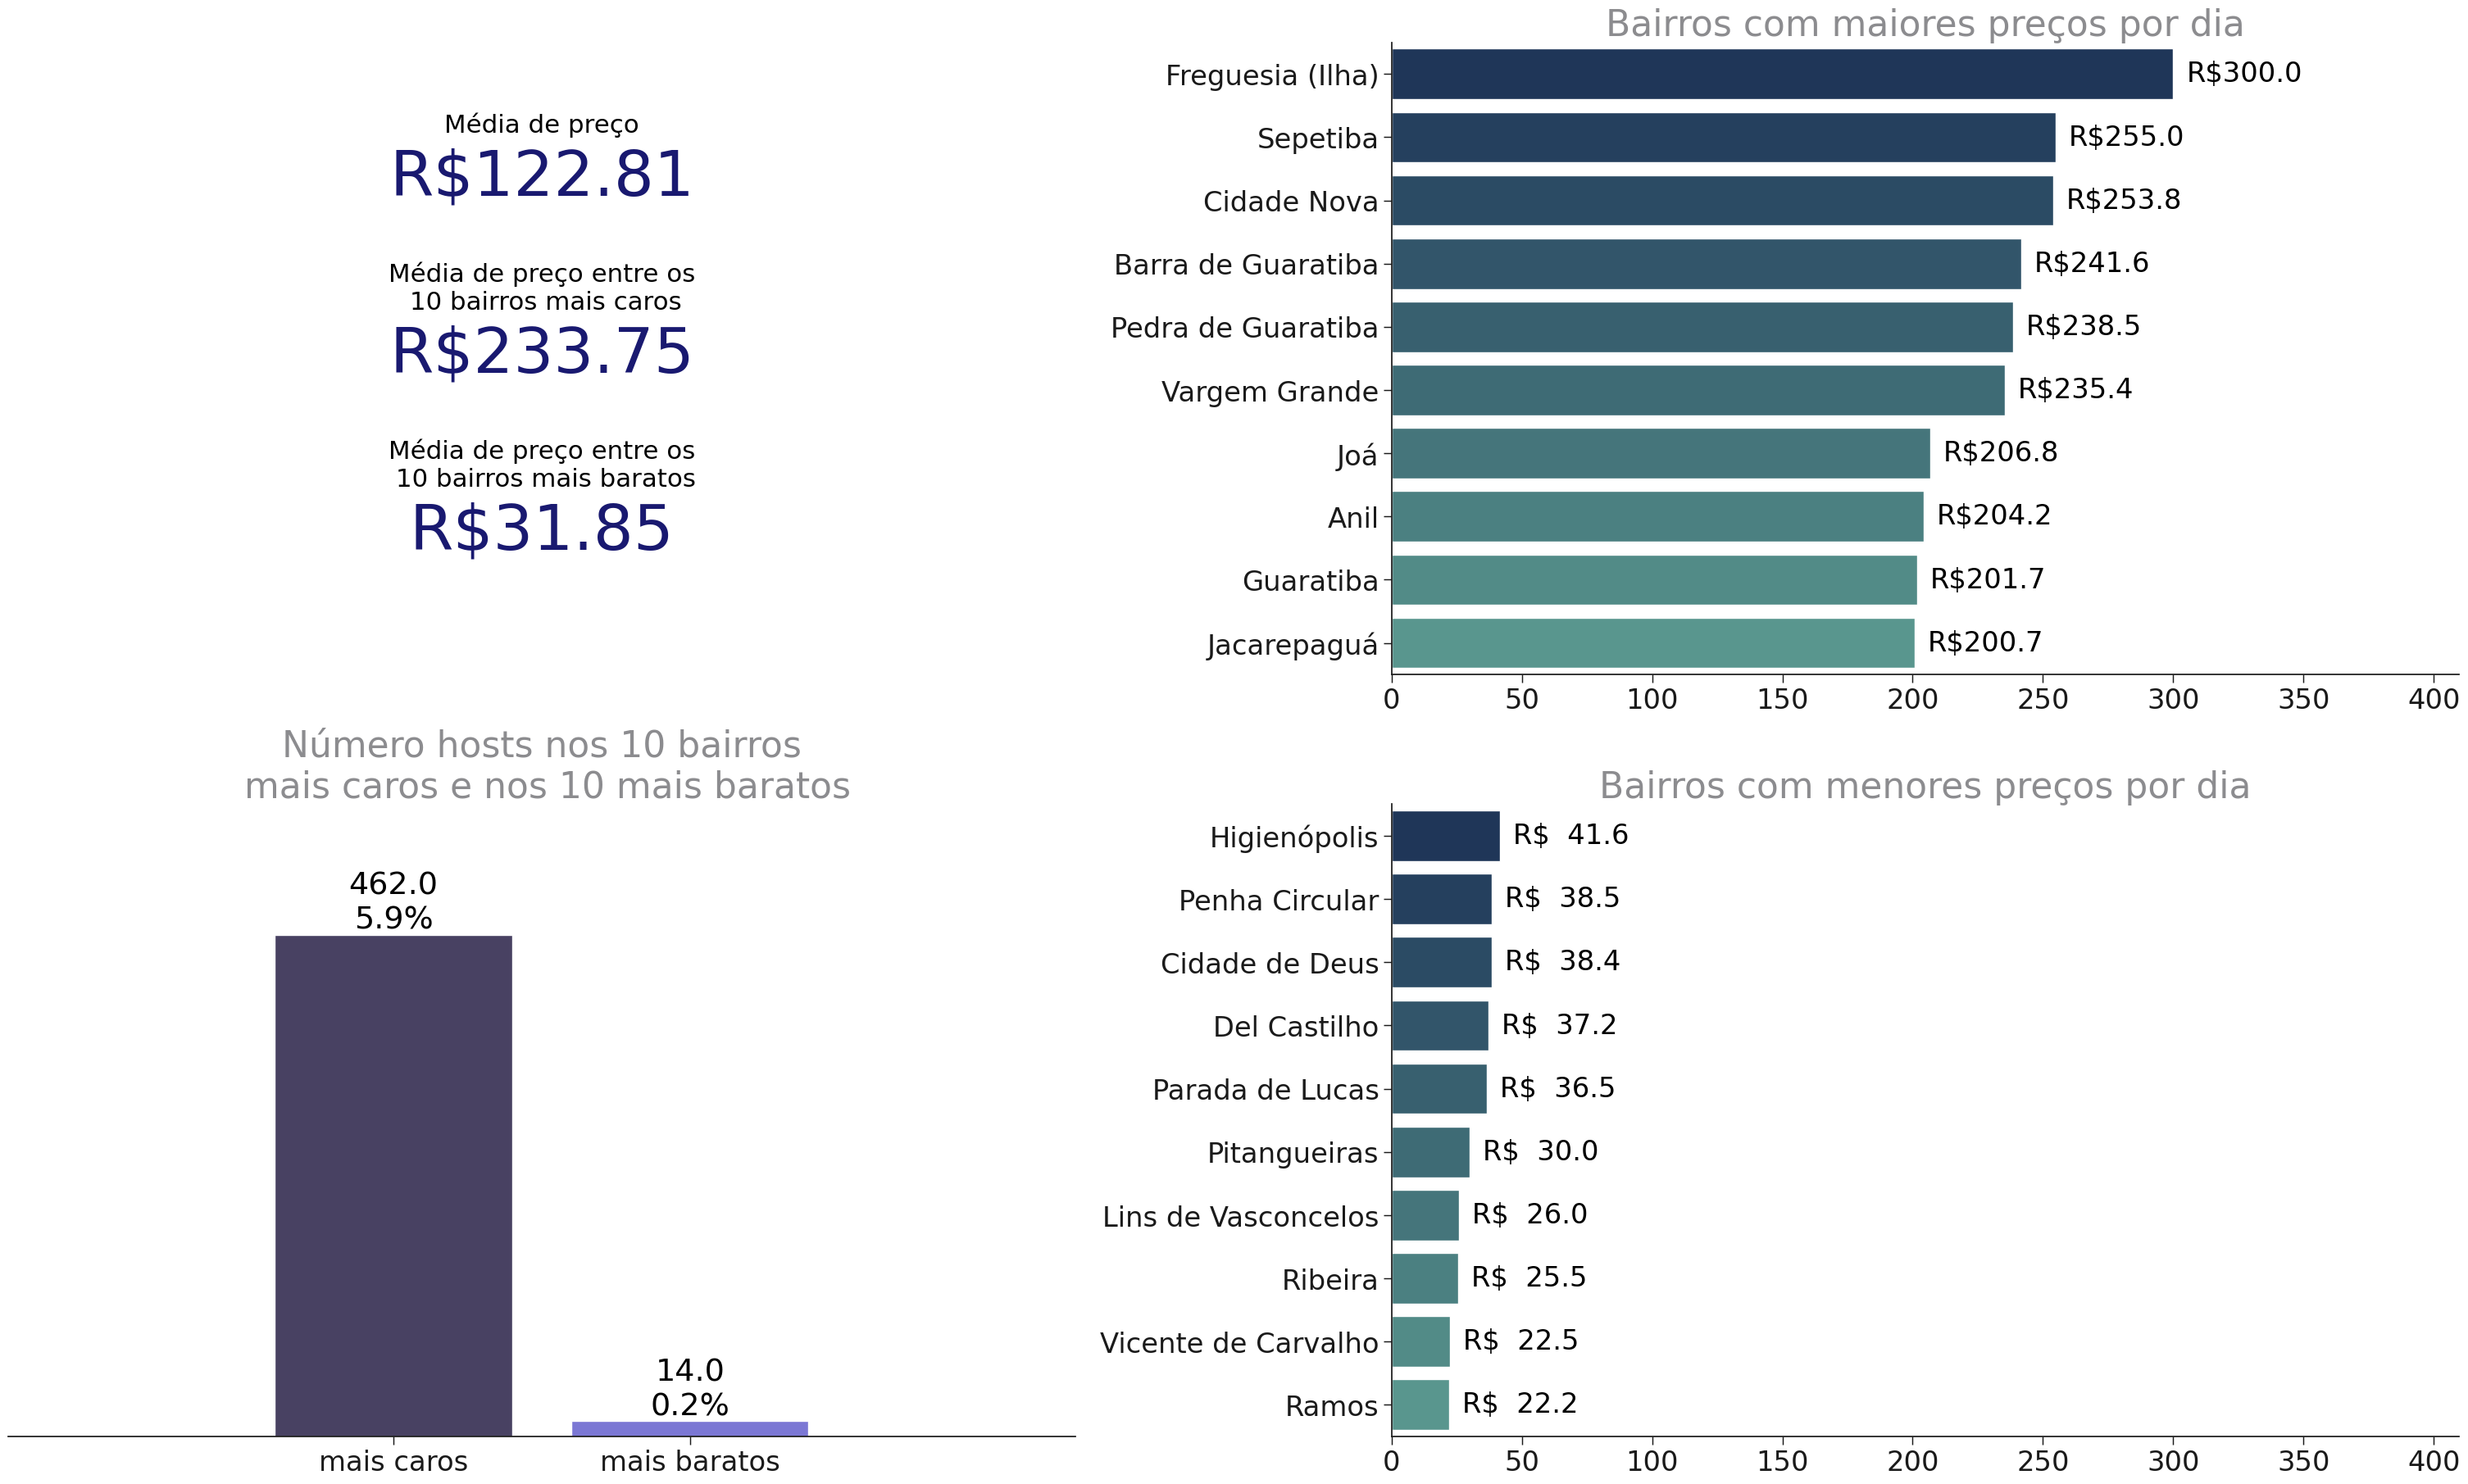

In [68]:
fig = plt.figure(constrained_layout=True, figsize=(30, 18))

gs = GridSpec(2,2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[0, 1])
ax4 = fig.add_subplot(gs[1, 1])

# figura 1: bairros mais caros
n=10
sns.barplot(ax=ax3,
            data=df_aux.head(n),
            y='neighbourhood_cleansed',
            x='price_dia_bairros',
            orient='h',
            palette=tmp.pmo_2(n))

# define eixos
tmp.set_axes_2(ax3,titulo='Bairros com maiores preços por dia')
xlims1 = li.muda_limites_eixo_x(ax3, frac=0.3)
ds=ng.num_barras_horizontais(ax3, f_tam_letra=0.023,prefix="R$", ds=5)



# figura 2: bairros mais baratos
sns.barplot(ax=ax4,
            data=df_aux.tail(n),            
            y='neighbourhood_cleansed',
            x='price_dia_bairros',
            orient='h',
            palette=tmp.pmo_2(n))

# define eixos
tmp.set_axes_2(ax4,titulo='Bairros com menores preços por dia')               
li.muda_limites_eixo_x(ax4, xlims=xlims1)
ng.num_barras_horizontais(ax4, f_tam_letra=0.023, prefix="R$  ", ds=ds)


# Figura 3
sns.barplot(ax=ax2,
            data=df_num_hosts,            
            y='numero_host',
            x='tipos_bairros',
            orient='v',
            palette=tmp.pmo_3(2))


# define eixos
tmp.set_axes_2(ax2,titulo='Número hosts nos 10 bairros\n mais caros e nos 10 mais baratos')
li.muda_limites_eixo_x(ax2, 0.4, tipo_aumento=2)
li.muda_limites_eixo_y(ax2, 0.2)
ng.porc_num_bar_verticais(ax2, sum_tot=sum_tot,  f_texto_bar=0.025,
                          f_tam_letra=0.026, d_porc=1,  d_num=1)
ax2.spines[['left']].set_visible(False)
ax2.set_yticks([])


# Escreve textos
params=dict(numLetra=0.021, n_maior= 2.5,cor_valor='#191970',
             cor_texto='black',f_textos=10)
an.anotacoes_valor_texto(ax1,texto1='Média de preço',
                         texto2=f'R${round(media_total,2)}', f_x=0.5,  f_y=0.85,**params)
an.anotacoes_valor_texto(ax1,texto1='Média de preço entre os\n 10 bairros mais caros',
                          texto2=f'R${round(meida_caros,2)}', f_x=0.5, f_y=0.57,**params)
an.anotacoes_valor_texto(ax1,texto1='Média de preço entre os\n 10 bairros mais baratos',
                          texto2=f'R${round(media_baratos,2)}', f_x=0.5, f_y=0.29,**params)
ax1.axis('off')
                         
plt.show()

### 4.2.3 Quais os bairros com a maior taxa de aceitação? Existe relação entre a taxa de aceitação e o preço médio da diária?<a id="aceitacao"></a>

**Seleção dos dados**</br>

Observando os dados, podemos ver que alguns bairros com poucos hosts possuem valores muito altos para a taxa de aceitação. É comum, por exemplo, bairros com 1 host onde este host tem taxa de aceitação 1 e portanto, a média da taxa de aceitação do bairro é 1. Estes valores são tendenciosos, pois não permitem uma estatística para avaliar a real situação dos hosts do bairro. 
Para evitar os dados mencionadas foi feita uma seleção no conjunto de dados antes da próxima análise onde foram considerados somente os dados de bairros com mais de 15 hosts.

In [67]:
# organiza os bairros por taxa de aceitação
df_aux=df_host_bairros\
            .sort_values(by='accaptante_bairros', ascending=False)
            
# seleciona somente bairros com mais de 15 hosts
df_aux=df_aux[df_aux['hosts_bairros']>15]

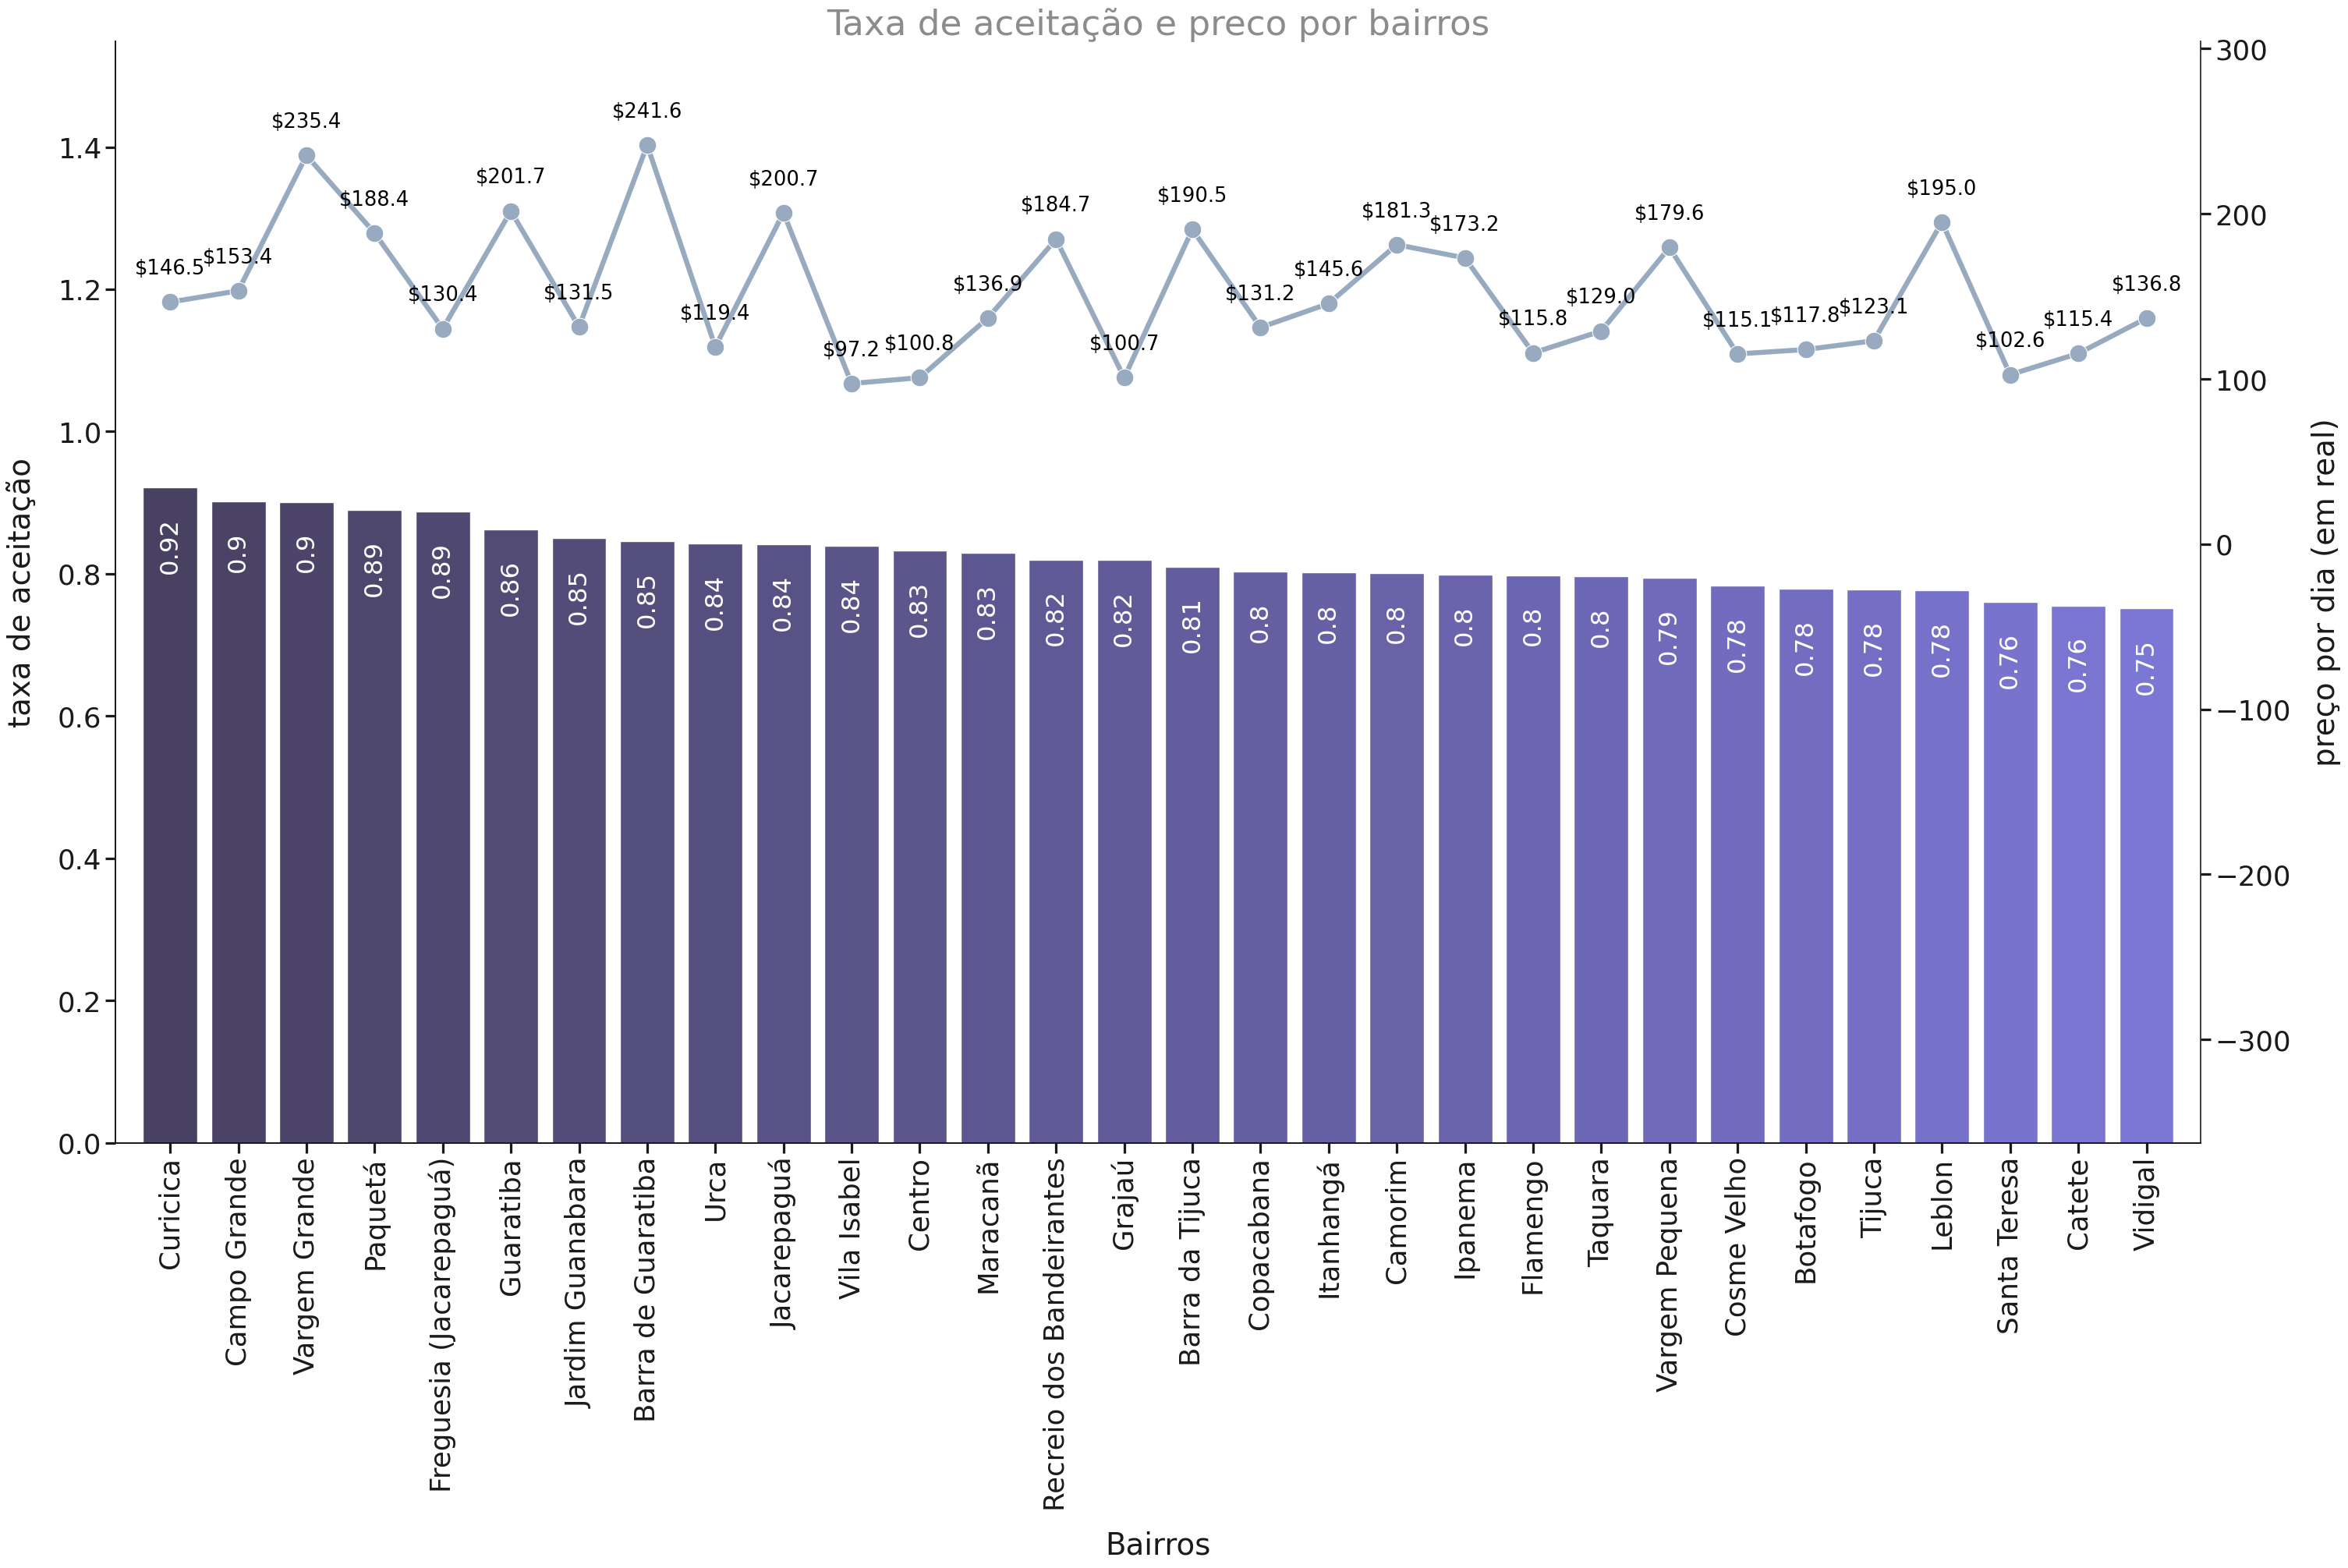

In [68]:
fig = plt.figure(constrained_layout=True, figsize=(30, 20))

gs = GridSpec(1,2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])

n=30

# Grafico de barras: preço médio
sns.barplot(ax=ax1,
            data=df_aux.head(n),
            x='neighbourhood_cleansed',
            y='accaptante_bairros',
            palette=tmp.pmo_3(n))
tmp.set_axes_1(ax1,titulo='Taxa de aceitação e preco por bairros',
               xlabel='Bairros',ylabel="taxa de aceitação")
li.muda_limites_eixo_y(ax1, frac=0.6)
li.muda_limites_eixo_x(ax1, frac=0.01, tipo_aumento=2)
ax1.tick_params(axis ='x',labelrotation = 90)
ni.num_int_barras_verticais(ax1,f_texto_bar=0.05,f_tam_letra=0.01,isTopo=True,
                         d=2,rotation=90,cor_texto="#FFFFFF")


# obtem um eixo comum
ax1_2 = ax1.twinx()

# Grafico de linhas: preço médio
sns.lineplot(ax=ax1_2, data=df_aux.head(n),
             x='neighbourhood_cleansed',
             y='price_dia_bairros',
             linewidth=0.002*tmp._k(ax1_2),
             color=tmp.c1_fraca,
             marker='o',
             markersize=0.007*tmp._k(ax1_2)
            )
tmp.set_axes_1(ax1_2,titulo='', ylabel="preço por dia (em real)")
ax1_2.spines[['right']].set_visible(True)
ax1_2.tick_params(left=False,bottom=True,right=True)
li.muda_limites_eixo_y(ax1_2, frac=2.5, tipo_aumento=1, ylims=None)
li.muda_limites_eixo_y(ax1_2, frac=0.1, tipo_aumento=2, ylims=None)
ng.num_graf_linhas(ax1_2,f_tam_letra=0.008,f_texto_linha=0.1,rotation=0, prefix="$")
                    
                    
plt.show()

### 4.2.4 Análise do número de quartos nas acomodações<a id="num_quartos"></a>

In [31]:
# organiza os bairros por numero de quartos
df_bedrooms=df_host_bairros\
            .sort_values(by='mean_bedrooms', ascending=False)
df_bedrooms=df_bedrooms.query('hosts_bairros>10')

# organiza os bairros por numero de quartos
df_acomodates=df_host_bairros\
            .sort_values(by='mean_acomodates', ascending=False)
df_acomodates=df_acomodates.query('hosts_bairros>10')

In [32]:
# medias de numero de quartos
media_quartos_total= df_bedrooms['mean_bedrooms'].mean()
meida_quartos_caros= df_bedrooms['mean_bedrooms'].head(10).mean()
media_quartos_baratos=df_bedrooms['mean_bedrooms'].tail(10).mean()

# medias de acomodações
media_acomod_total= df_acomodates['mean_acomodates'].mean()
meida_acomod_caros= df_acomodates['mean_acomodates'].head(10).mean()
media_acomod_baratos=df_acomodates['mean_acomodates'].tail(10).mean()


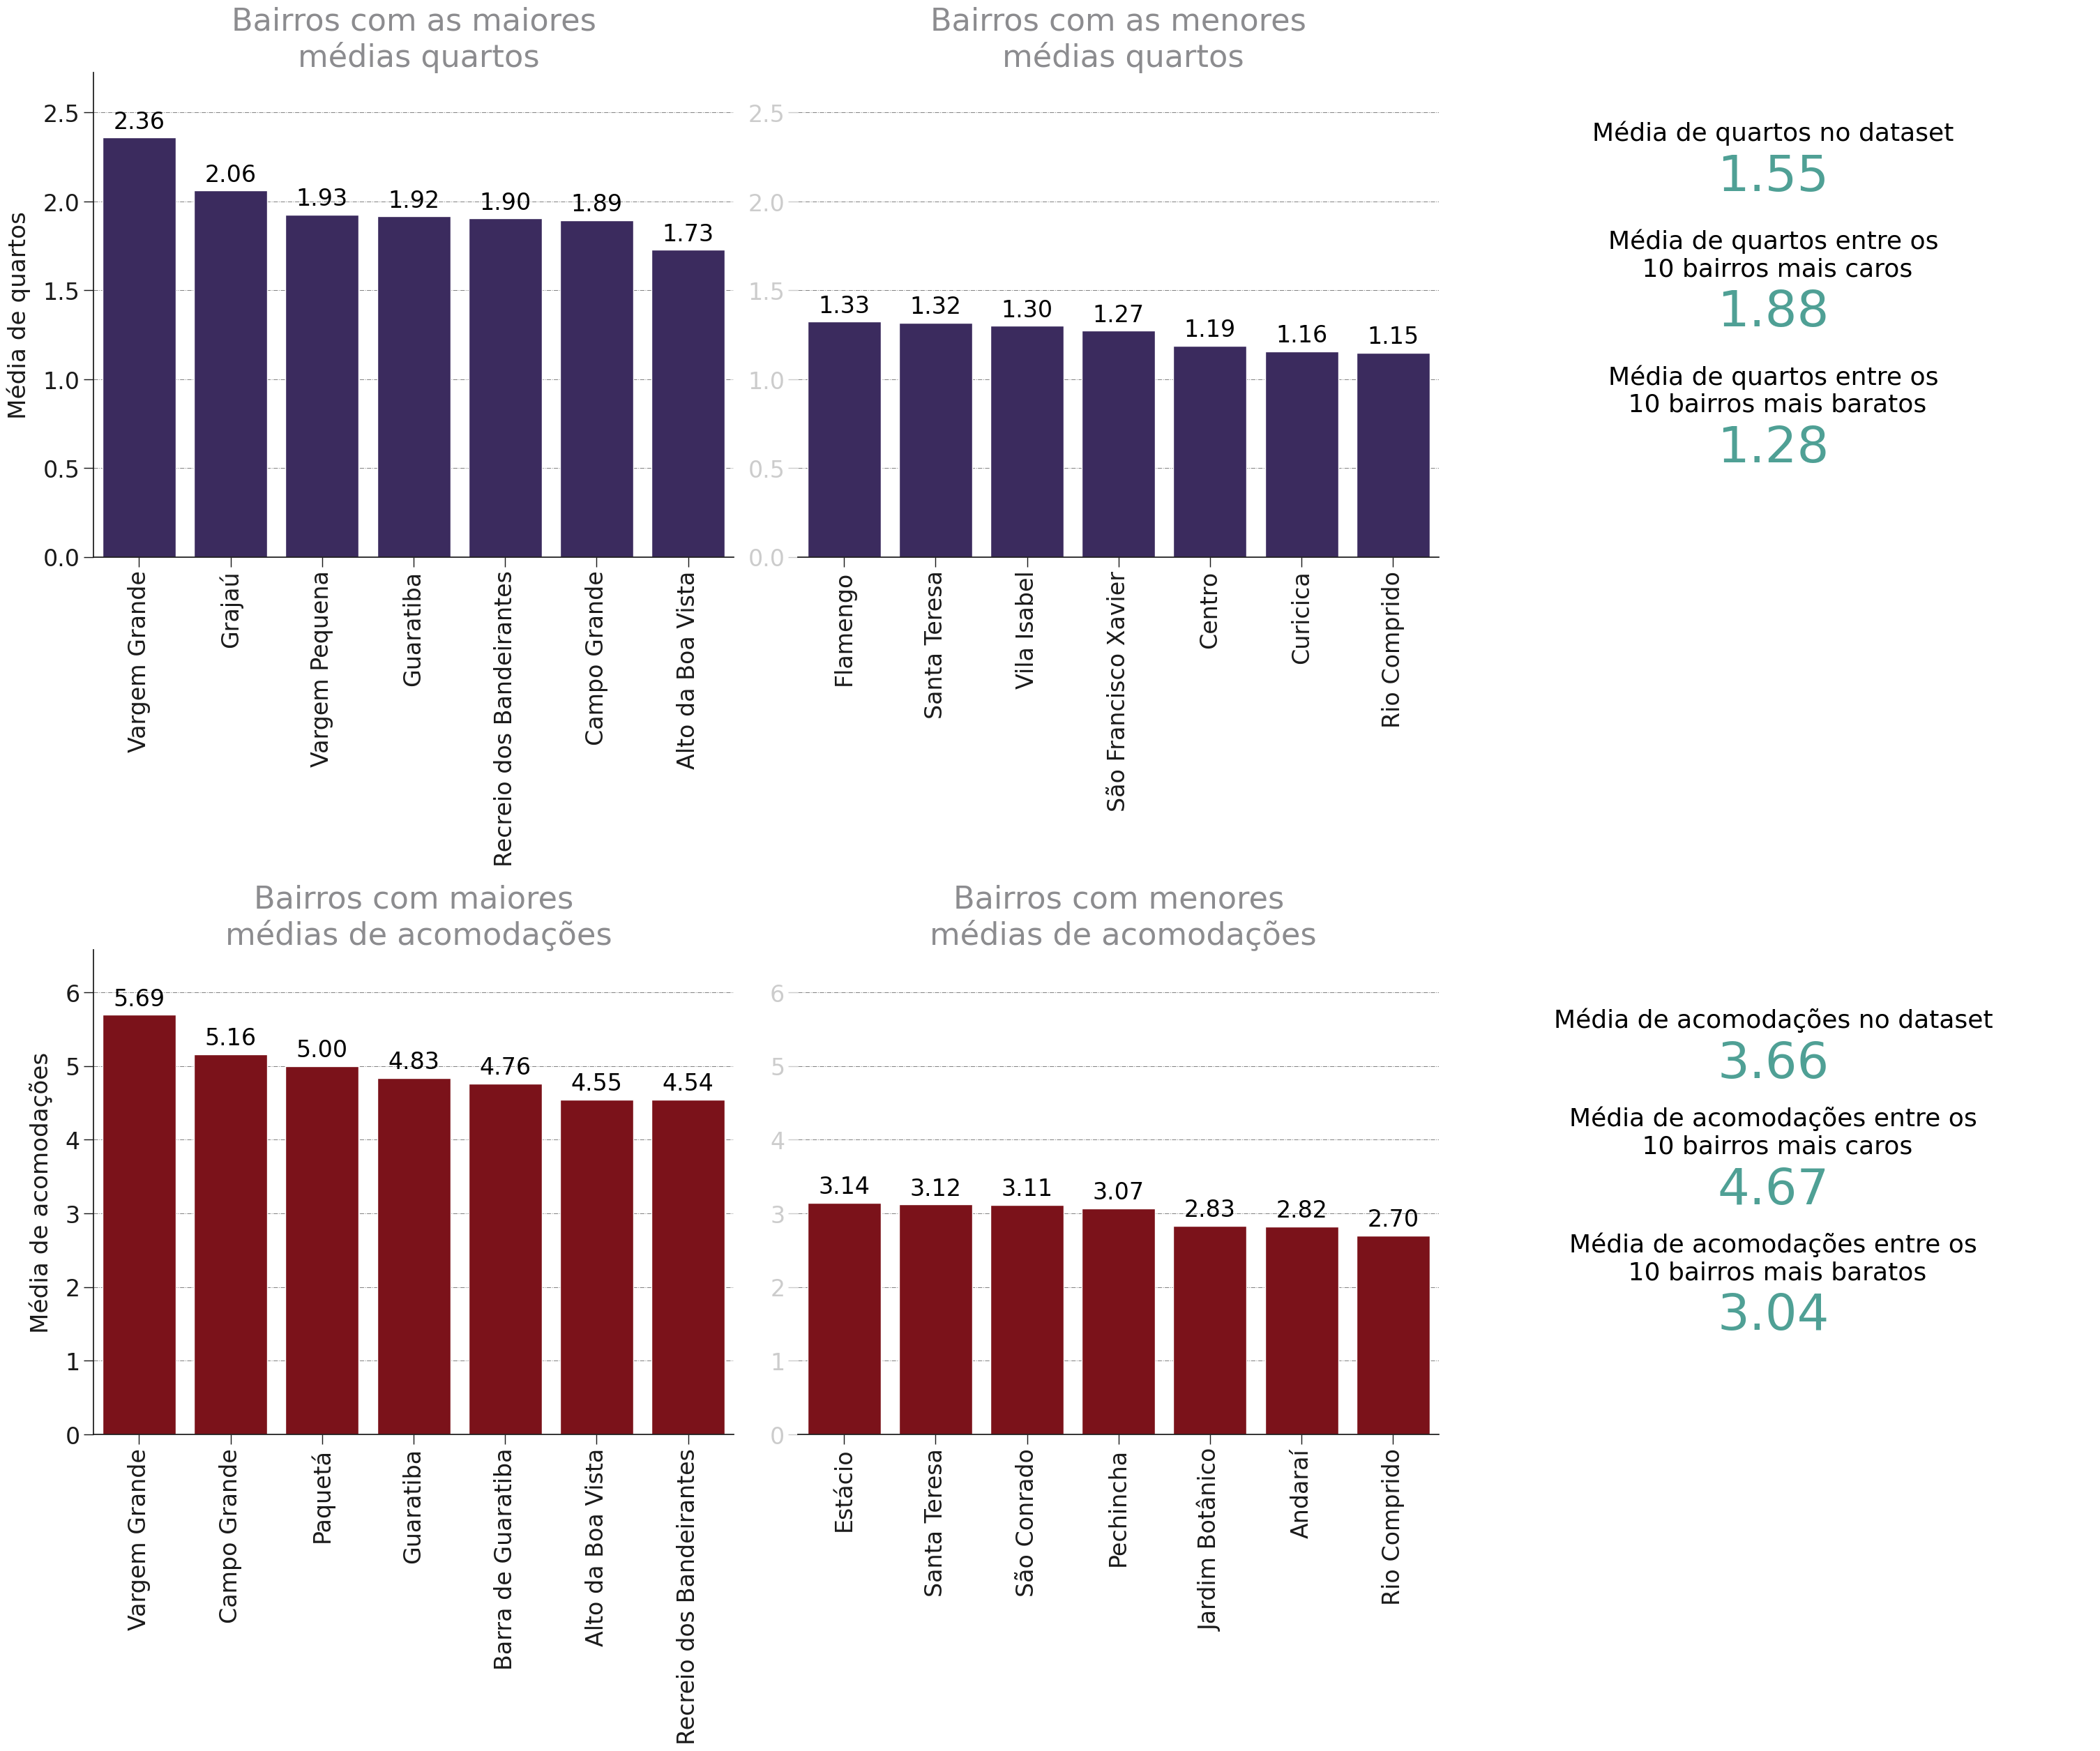

In [42]:
fig = plt.figure(constrained_layout=True, figsize=(30, 25))

gs = GridSpec(2,3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 0])
ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[1, 2])

# figura 1: bedrooms
n=7
sns.barplot(ax=ax1, data=df_bedrooms.head(n),
            y='mean_bedrooms',x='neighbourhood_cleansed',            
            color=tmp.c1_forte)
# define eixos
tmp.set_axes_31(ax1,titulo='Bairros com as maiores\n médias quartos',
               ylabel="Média de quartos")
ylims1 = li.muda_limites_eixo_y(ax1, frac=0.1)
ds=ng.num_barras_verticais(ax1, d=2,f_tam_letra=0.035)
ax1.tick_params(axis ='x',labelrotation = 90)
ax1.yaxis.grid(linewidth=0.7,color='grey',linestyle='-.')


# figura 2: bedrooms
sns.barplot(ax=ax2,data=df_bedrooms.tail(n),            
            y='mean_bedrooms',x='neighbourhood_cleansed',            
            color=tmp.c1_forte)
# define eixos
tmp.set_axes_31(ax2,titulo='Bairros com as menores\n médias quartos')                
li.muda_limites_eixo_y(ax2, ylims=ylims1)
ds=ng.num_barras_verticais(ax2, d=2,f_tam_letra=0.035,ds=ds)
ax2.tick_params(axis ='x',labelrotation = 90)
ax2.yaxis.grid(linewidth=0.7,color='grey',linestyle='-.')
ax2.spines['left'].set_visible(False)
ax2.tick_params(axis ='y', colors='#cccccc')




# figura 3: Acomodades
sns.barplot(ax=ax4,
            data=df_acomodates.head(n),
            y='mean_acomodates',
            x='neighbourhood_cleansed',            
            color=tmp.c2_forte)

# define eixos
tmp.set_axes_31(ax4,titulo='Bairros com maiores\n médias de acomodações',
              ylabel="Média de acomodações")
ylims1 = li.muda_limites_eixo_y(ax4, frac=0.1)
ds=ng.num_barras_verticais(ax4, d=2,f_tam_letra=0.035)
ax4.tick_params(axis ='x',labelrotation = 90)
ax4.yaxis.grid(linewidth=0.7,color='gray',linestyle='-.')


# figura 4: acomodates
sns.barplot(ax=ax5,
            data=df_acomodates.tail(n),            
            y='mean_acomodates',
            x='neighbourhood_cleansed',            
            color=tmp.c2_forte)

# define eixos
tmp.set_axes_31(ax5,titulo='Bairros com menores\n médias de acomodações')                
li.muda_limites_eixo_y(ax5, ylims=ylims1)
ds=ng.num_barras_verticais(ax5, d=2,f_tam_letra=0.035,ds=ds)
ax5.tick_params(axis ='x',labelrotation = 90)
ax5.yaxis.grid(linewidth=0.7,color='gray',linestyle='-.')
ax5.spines['left'].set_visible(False)
ax5.tick_params(axis ='y', colors='#cccccc')


# parametros para os textos
params=dict(numLetra=0.038, n_maior= 2,
            cor_valor=tmp.c3_normal, #'#191970',
            cor_texto='black',f_textos=14)



# Escreve textos: Gráfico 1
an.anotacoes_valor_texto(ax3,texto1='Média de quartos no dataset',
                         texto2=f'{round(media_quartos_total,2)}', f_x=0.5,  f_y=0.85,**params)
an.anotacoes_valor_texto(ax3,texto1='Média de quartos entre os\n 10 bairros mais caros',
                          texto2=f'{round(meida_quartos_caros,2)}', f_x=0.5, f_y=0.57,**params)
an.anotacoes_valor_texto(ax3,texto1='Média de quartos entre os\n 10 bairros mais baratos',
                          texto2=f'{round(media_quartos_baratos,2)}', f_x=0.5, f_y=0.29,**params)
ax3.axis('off')


# Escreve textos: Gráfico 2
an.anotacoes_valor_texto(ax6,texto1='Média de acomodações no dataset',
                         texto2=f'{round(media_acomod_total,2)}', f_x=0.5,  f_y=0.83,**params)
an.anotacoes_valor_texto(ax6,texto1='Média de acomodações entre os\n 10 bairros mais caros',
                          texto2=f'{round(meida_acomod_caros,2)}', f_x=0.5, f_y=0.57,**params)
an.anotacoes_valor_texto(ax6,texto1='Média de acomodações entre os\n 10 bairros mais baratos',
                          texto2=f'{round(media_acomod_baratos,2)}', f_x=0.5, f_y=0.31,**params)
ax6.axis('off')

plt.show()

